      principal component 1  principal component 2  principal component 3  \
0              -4326.383979             921.566882             183.708383   
1               4118.916665           -2432.846346            2369.969289   
2               1497.907641           -1997.578694           -2125.631328   
3               1394.548536           -1488.743453           -2431.799649   
4              -3743.351896             757.342657             512.476492   
...                     ...                    ...                    ...   
8945           -4208.357725            1122.443291             136.925895   
8946           -4123.923788             951.683820             634.880037   
8947           -4379.443989             911.504583             101.257055   
8948           -4791.117531            1032.540961             358.038214   
8949           -3623.702535            1555.134786             -28.368152   

      TENURE  
0         12  
1         12  
2         12  
3         12  


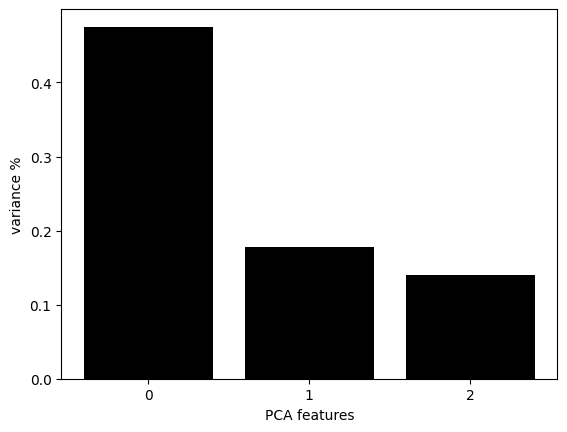

Silhouette score is
0.5109307274319468
              precision    recall  f1-score   support

           0       0.00      1.00      0.00       0.0
           1       0.00      1.00      0.00       0.0
           2       0.00      1.00      0.00       0.0
           6       1.00      0.00      0.00     204.0
           7       1.00      0.00      0.00     190.0
           8       1.00      0.00      0.00     196.0
           9       1.00      0.00      0.00     175.0
          10       1.00      0.00      0.00     236.0
          11       1.00      0.00      0.00     365.0
          12       1.00      0.00      0.00    7584.0

    accuracy                           0.00    8950.0
   macro avg       0.70      0.30      0.00    8950.0
weighted avg       1.00      0.00      0.00    8950.0

[[   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [ 175    1   28    0    0    0    0    0  

In [22]:
#1. Principal Component Analysis

#a) Apply PCA on CC dataset

from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# You can add the parameter data_home to wherever to where you want to download your data
dataset = pd.read_csv('CC.csv')
dataset=dataset.fillna(dataset.mean())
x = dataset.iloc[:,1:-1]
y = dataset.iloc[:,-1]

# Apply transform to dataset
pca = PCA(n_components=3)
x_pca = pca.fit_transform(x)
principalDf = pd.DataFrame(data = x_pca, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
finalDf = pd.concat([principalDf, dataset.iloc[:,-1]], axis = 1)
finalDf.head()
print(finalDf)


# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.show()


#1.
# b) Apply k-means algorithm on the PCA result
x = finalDf.iloc[:,0:-1]
y = finalDf.iloc[:,-1]

# Create a KMeans instance with k clusters: model
model = KMeans(n_clusters=3)
    
# Fit model to samples
model.fit(x)
    
# Calculate silhouette score    
y_cluster_kmeans = model.predict(x)
from sklearn import metrics
score = metrics.silhouette_score(x, y_cluster_kmeans)
print("Silhouette score is")
print(score)


# Summary of the predictions made by the classifier
print(classification_report(y, y_cluster_kmeans, zero_division=1))
print(confusion_matrix(y, y_cluster_kmeans))


train_accuracy = accuracy_score(y, y_cluster_kmeans)
print("\nAccuracy for our Training dataset with PCA:", train_accuracy)


In [23]:
#1.
#c) Scaling+PCA+K-Means

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

dataset= pd.read_csv("CC.csv")
dataset=dataset.fillna(dataset.mean())
x = dataset.iloc[:,1:-1]
y = dataset.iloc[:,-1]

# Scaling
scaler = StandardScaler()
X_Scale = scaler.fit_transform(x)

# PCA
pca2 = PCA(3)
principalComponents = pca2.fit_transform(X_Scale)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3'])
finalDf = pd.concat([principalDf,dataset.iloc[:,-1]], axis = 1)
finalDf.head()

# k-means
X = finalDf.iloc[:,0:-1]
y = finalDf["TENURE"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,random_state=0)
model = KMeans(3)
model.fit(X_train,y_train)

# predict the cluster for each training data
y_cluster = model.predict(X_train)

# Summary of the predictions
print(classification_report(y_train, y_cluster, zero_division=1))
print("Confusion matrix for training data:")
print(confusion_matrix(y_train, y_cluster))

#Calculate sihouette Score
score = metrics.silhouette_score(X_train, y_cluster)
print("Sihouette Score for training data: ",score) 

# Accuracy calculation
train_accuracy = accuracy_score(y_train, y_cluster)
print("Accuracy for training dataset with PCA:", train_accuracy)


# predict the cluster for each testing data
y_cluster1 = model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_cluster1, zero_division=1))
print("Confusion matrix for testing data:")
print(confusion_matrix(y_test, y_cluster1))

#Calculate sihouette Score
score = metrics.silhouette_score(X_test, y_cluster1)
print("Sihouette Score for testing data: ",score) 

#Calculate accuracy
train_accuracy = accuracy_score(y_test, y_cluster1)
print("\nAccuracy for testing dataset with PCA:", train_accuracy)


              precision    recall  f1-score   support

           0       0.00      1.00      0.00       0.0
           1       0.00      1.00      0.00       0.0
           2       0.00      1.00      0.00       0.0
           6       1.00      0.00      0.00     142.0
           7       1.00      0.00      0.00     135.0
           8       1.00      0.00      0.00     132.0
           9       1.00      0.00      0.00     122.0
          10       1.00      0.00      0.00     152.0
          11       1.00      0.00      0.00     264.0
          12       1.00      0.00      0.00    5049.0

    accuracy                           0.00    5996.0
   macro avg       0.70      0.30      0.00    5996.0
weighted avg       1.00      0.00      0.00    5996.0

Confusion matrix for training data:
[[   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [ 108   30    4    0    0    0    0    0    0

In [24]:
# 2.pd_speech_features.csv

from sklearn.svm import SVC

# a) Scaling
data_pd = pd.read_csv('pd_speech_features.csv')
data_pd.head()
x = data_pd.drop('class',axis=1).values
y = data_pd['class'].values

scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

# b) Apply PCA(k=3)
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x_scale)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3'])

finalDf = pd.concat([principalDf, data_pd[['class']]], axis = 1)
finalDf.head()

# c) SVM
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.34,random_state=0)

svm = SVC()
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)

# Summary of the predictions made by SVM
print(classification_report(y_test, y_pred, zero_division=1))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

# Accuracy
svm_acc = accuracy_score(y_pred,y_test)
print('Accuracy is',svm_acc )

# Silhouette Score
score = metrics.silhouette_score(x_test, y_pred)
print("Sihouette Score: ",score) 

              precision    recall  f1-score   support

           0       1.00      0.02      0.03        62
           1       0.76      1.00      0.87       196

    accuracy                           0.76       258
   macro avg       0.88      0.51      0.45       258
weighted avg       0.82      0.76      0.67       258

Confusion matrix:
[[  1  61]
 [  0 196]]
Accuracy is 0.7635658914728682
Sihouette Score:  0.8099190203115335


In [25]:
#3. Linear Discriminant Analysis (LDA) on Iris.csv

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler, LabelEncoder

data_iris = pd.read_csv('Iris.csv')
data_iris.head()
data_iris.isnull().any()

x = data_iris.iloc[:,1:-1]
y = data_iris.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
le = LabelEncoder()
y = le.fit_transform(y)


lda = LDA(n_components=2)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)
print("Dimensionality reduced to 2 by applying LDA:")
print(x_train.shape,x_test.shape)

Dimensionality reduced to 2 by applying LDA:
(105, 2) (45, 2)


In [26]:
# 4. Difference between PCA and LDA

"""1. PCA (Principal Component Analysis) is an unsupervised learning algorithm while LDA (Linear Discriminant Analysis) is a supervised learning algorithm.

2. PCA ignores class labels and focuses on finding the principal components that maximizes the variance in a given data. Thus it is an unsupervised algorithm.
On the other hand, LDA is a supervised algorithm that intends to find the linear discriminants that represents those axes which maximize separation between different classes.

3. LDA performs better multi-class classification tasks than PCA. 
However, PCA performs better when the sample size is comparatively small.

4. Some of the practical applications of LDA are listed below:
Face Recognition – LDA is used in face recognition to reduce the number of attributes to a more manageable number before the actual classification.
Medical – You can use LDA to classify the patient disease as mild, moderate or severe
The principal application of PCA is dimension reduction. Practical applications of PCA is Image compression and find patterns in the high-dimensional datasets."""

'1. PCA (Principal Component Analysis) is an unsupervised learning algorithm while LDA (Linear Discriminant Analysis) is a supervised learning algorithm.\n\n2. PCA ignores class labels and focuses on finding the principal components that maximizes the variance in a given data. Thus it is an unsupervised algorithm.\nOn the other hand, LDA is a supervised algorithm that intends to find the linear discriminants that represents those axes which maximize separation between different classes.\n\n3. LDA performs better multi-class classification tasks than PCA. \nHowever, PCA performs better when the sample size is comparatively small.\n\n4. Some of the practical applications of LDA are listed below:\nFace Recognition – LDA is used in face recognition to reduce the number of attributes to a more manageable number before the actual classification.\nMedical – You can use LDA to classify the patient disease as mild, moderate or severe\nThe principal application of PCA is dimension reduction. Pra